In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from ultralytics import YOLO
import yaml
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Literal
from PIL import Image
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
class CFG:
  DEBUG = False
  SEED = 42
  DATASET_PATH = '/content/drive/MyDrive/dataset'
  NAME = 'detection-PPE_final_yolov8l'

  CLASSES = ['Gloves', 'Glasses', 'Shoes', 'Helmet', 'Vest', 'Person']
  NUM_CLASSES_TO_TRAIN = len(CLASSES)
  NUM_CORES = 2
  # training
  EPOCHS = 3 if DEBUG else 200
  BATCH_SIZE = 16
  OPTIMIZER = 'AdamW'
  LR = 1e-4
  LR_FACTOR = 0.01
  WEIGHT_DECAY = 5e-4
  DROPOUT = 0.0
  PATIENCE = 20
  PROFILE = False
  LABEL_SMOOTHING = 0.0


  # model
  YOLO_MODEL = "yolov8l.pt"

  # output

  OUTPUT_DIR = "/content/drive/MyDrive/PPE-detection/runs"
  ARTIFACTS = '/content/drive/MyDrive/PPE-detection/artifacts'

In [ ]:
os.makedirs(CFG.ARTIFACTS, exist_ok=True)
os.makedirs(CFG.OUTPUT_DIR, exist_ok=True)

In [ ]:
dict_yaml_file = {
    'train': os.path.join(CFG.DATASET_PATH, 'train'),
    'test' : os.path.join(CFG.DATASET_PATH, 'test'),
    'val'  : os.path.join(CFG.DATASET_PATH, 'valid'),
    'nc'   : CFG.NUM_CLASSES_TO_TRAIN,
    'names': CFG.CLASSES
}

In [ ]:
def create_yaml_file(file_path = CFG.DATASET_PATH, data = dict_yaml_file):

    with open(os.path.join(file_path, 'data.yaml'), 'w+') as file:
        yaml.dump(data, file)

In [ ]:
def read_yaml_file(file_path = CFG.DATASET_PATH):
    with open(os.path.join(file_path, 'data.yaml'), 'r') as file:
        try :
            return yaml.safe_load(file)
        except yaml.YAMLError as e:
            print(e)
        except Exception as e:
            print(e)

In [ ]:
### print it with newlines
def print_yaml_data(data):
    formatted_yaml = yaml.dump(data, default_style=False)
    print(formatted_yaml)

In [ ]:
# create_yaml_file()

In [ ]:
yaml_data = read_yaml_file()

In [ ]:
print_yaml_data(yaml_data)

names:
- Gloves
- Glasses
- Shoes
- Helmet
- Vest
- Person
nc: 6
test: /content/drive/MyDrive/dataset/test
train: /content/drive/MyDrive/dataset/train
val: /content/drive/MyDrive/dataset/valid



In [ ]:
def display_one_image(image, print_info = True, axis : Literal['off', 'on'] = 'off'):

    if isinstance(image, str):
        img = Image.open(image)
        plt.imshow(img)
    elif isinstance(image, np.ndarray):
        image = image[..., ::-1]  # BGR to RGB
        img = Image.fromarray(image)
        plt.imshow(img)
    else:
        raise ValueError("Unsupported image format")

    if print_info:
        print(f"type : {type(img)}\n")
        print(f"shape : {np.array(img).shape}\n")
    plt.axis(axis)
    plt.show()

In [ ]:
# Load fresh model
model = YOLO(CFG.YOLO_MODEL)

100%|██████████| 83.7M/83.7M [00:00<00:00, 137MB/s]


In [ ]:
# Full training
print("Starting training ...............")
model.train(
    data=os.path.join(CFG.DATASET_PATH, 'data.yaml'),
    epochs=CFG.EPOCHS,
    imgsz=640,
    batch=CFG.BATCH_SIZE,
    device=0,
    workers=CFG.NUM_CORES,
    project= CFG.OUTPUT_DIR,
    name=CFG.NAME,
    seed=CFG.SEED,
    optimizer=CFG.OPTIMIZER,

    val = True,
    amp = True,
    exist_ok = True,
    resume = False,
    verbose = True,

)
print("Training complete!")
print(f"Training complete! Results saved in {CFG.OUTPUT_DIR}/{CFG.NAME}")

Starting training ...............
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=detection-PPE_final_yolov8l, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           


  7                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  8                  -1  3   4461568  ultralytics.nn.modules.block.C2f             [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.block.C2f             [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1247744  ultralytics.nn.modules.block.C2f             [768,

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.2±0.1 MB/s, size: 55.2 KB)


train: Scanning /content/drive/MyDrive/dataset/train/labels.cache... 2605 images, 75 backgrounds, 5 corrupt: 100%|██████████| 2605/2605 [00:00<?, ?it/s]

train: /content/drive/MyDrive/dataset/train/images/1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy_jpg.rf.35ed51188a266a262a24924aa32463a0.jpg: ignoring corrupt image/label: Label class 7 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/drive/MyDrive/dataset/train/images/1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy_jpg.rf.93dd6595c9b6f435a03af2e09588744c.jpg: ignoring corrupt image/label: Label class 9 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/drive/MyDrive/dataset/train/images/1288788-une-employee-aide-des-voyageurs-en-provenance-de-chine-le-26-janvier-2020-a-l-aeroport-de-roissy_jpg.rf.a988e2e512aa158adc5f82945a436de6.jpg: ignoring corrupt image/label: Label class 8 exceeds dataset class count 6. Possible class labels are 0-5
train: /content/drive/MyDrive/dataset/train/images/1288788-une-employee-aide-des-v

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 48.4 KB)


val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 114 images, 30 backgrounds, 0 corrupt: 100%|██████████| 114/114 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      9.27G      1.731      2.661      1.794         43        640: 100%|██████████| 163/163 [13:42<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        114        286     0.0242     0.0913     0.0122    0.00315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      9.67G      1.671      2.443      1.727        130        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        114        286     0.0133      0.145    0.00461    0.00128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200       9.7G      1.567      2.292       1.66         72        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        114        286      0.206      0.238     0.0991     0.0343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      9.69G      1.516      2.161      1.622         83        640: 100%|██████████| 163/163 [02:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        114        286      0.269      0.249      0.158     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      9.75G      1.466      2.082      1.591         21        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        114        286      0.416        0.2      0.134     0.0561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       9.8G      1.412      2.007       1.56         47        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.566      0.252      0.248      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      9.62G      1.384      1.927      1.525         92        640: 100%|██████████| 163/163 [02:15<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286       0.41      0.323      0.281      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      9.71G      1.357      1.893      1.513         59        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.453      0.349      0.326      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      9.75G      1.336      1.812      1.496         69        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        114        286      0.459      0.373      0.365      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      9.79G      1.291      1.755      1.463         62        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        286      0.468      0.317      0.275      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      9.61G      1.294      1.745      1.456         89        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        286      0.469      0.411      0.367      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      9.72G      1.261      1.706      1.454         72        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        114        286      0.387      0.372      0.313      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      9.79G      1.257      1.674      1.439         90        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        114        286      0.519       0.44      0.382      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      9.71G      1.241      1.649      1.421         63        640: 100%|██████████| 163/163 [02:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        114        286      0.466       0.45      0.403      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      9.63G       1.23      1.581      1.411         51        640: 100%|██████████| 163/163 [02:15<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        114        286      0.602      0.436      0.422      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      9.64G      1.216      1.579      1.407         99        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        286      0.576      0.489      0.452      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      9.74G      1.202      1.531      1.388         51        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.631      0.491      0.476      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      9.78G      1.192       1.51      1.386         63        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        114        286      0.651      0.491      0.535      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      9.25G      1.177      1.489      1.369         86        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.683      0.503      0.544      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      9.76G       1.18      1.455      1.367         64        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.619      0.502      0.487      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      9.62G      1.152      1.441      1.362         58        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        114        286      0.607      0.528      0.533      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      9.76G      1.153      1.408       1.35         47        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.775      0.523      0.591      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      9.62G      1.139      1.379      1.341         64        640: 100%|██████████| 163/163 [02:17<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        114        286      0.784      0.514      0.609      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      9.74G      1.151      1.376      1.341         59        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.805      0.587       0.65        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      9.68G       1.12      1.335      1.326         58        640: 100%|██████████| 163/163 [02:16<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        114        286       0.78      0.507      0.581       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      9.71G      1.101        1.3      1.317        107        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.666      0.558      0.535      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      9.57G      1.103        1.3      1.318         73        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.788      0.558      0.651      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200       9.7G      1.118      1.289      1.315         63        640: 100%|██████████| 163/163 [02:16<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        114        286      0.763      0.562      0.627      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      9.69G      1.083       1.24      1.295         48        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.736      0.586      0.655      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      9.71G      1.097      1.272      1.302         90        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.819      0.565      0.652      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      9.87G      1.071       1.23      1.293        100        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        114        286      0.785      0.593       0.66      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200       9.7G      1.077      1.201      1.286        108        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        114        286      0.838      0.544      0.646      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      9.77G      1.064      1.185       1.28         42        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.626        0.6      0.556      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      9.73G      1.051      1.166       1.27         55        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.727      0.616      0.607      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      9.62G       1.04      1.155      1.269         63        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        114        286      0.844      0.547      0.678      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      9.75G      1.035      1.138      1.263         74        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        114        286      0.764      0.609      0.668      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      9.74G      1.039      1.133      1.262         60        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        114        286      0.797       0.65      0.704      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      9.72G      1.016      1.099       1.25         54        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.874      0.632      0.717       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      9.57G      1.003      1.075      1.241        134        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        114        286      0.852      0.601      0.698      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      9.75G      1.006      1.072      1.236         87        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.877        0.6        0.7      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      9.66G      1.004      1.079      1.231         74        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.844       0.64      0.716      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      9.75G     0.9801      1.034      1.222         63        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.821       0.65      0.708      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      9.89G     0.9837      1.048      1.225         75        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.865       0.62      0.724      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      9.69G     0.9809      1.031      1.221        111        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.882      0.609      0.714      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      9.69G     0.9785      1.016      1.221         56        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286       0.82      0.617      0.715      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      9.78G     0.9522     0.9993      1.208         64        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        114        286      0.907      0.674      0.767      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      9.58G      0.945     0.9725        1.2         77        640: 100%|██████████| 163/163 [02:15<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.898      0.622      0.746      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       9.7G     0.9339     0.9752      1.192         55        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        114        286      0.864      0.641      0.742      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      9.68G     0.9484     0.9716      1.197         51        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        114        286      0.846      0.688      0.755      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      9.71G     0.9302     0.9282      1.188        123        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.892       0.71      0.774      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      9.82G     0.9372     0.9374      1.188         32        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286      0.838      0.693       0.75      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      9.71G     0.9377     0.9493      1.192         42        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.859      0.699      0.773      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      9.69G     0.9165     0.9197      1.178         78        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.889      0.667      0.749      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      9.74G     0.9074     0.8925      1.166         61        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286      0.853      0.699      0.761      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      9.56G     0.9024     0.8873      1.156         70        640: 100%|██████████| 163/163 [02:15<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        114        286      0.856      0.676      0.749      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      9.77G     0.8973     0.8953      1.166         70        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.877      0.712       0.77       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      9.74G     0.8875     0.8761      1.156         89        640: 100%|██████████| 163/163 [02:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        114        286      0.871      0.699      0.751      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      9.63G     0.8948     0.8807       1.16         37        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.879       0.71       0.76      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      9.61G     0.9083     0.8888      1.172         49        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.914      0.673      0.772      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      9.77G     0.8692     0.8512      1.153         73        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.891      0.681      0.779      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      9.76G     0.8871     0.8612      1.154         45        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.894      0.675       0.76      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      9.76G      0.868     0.8521      1.146         86        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.873      0.682      0.755      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      9.91G     0.8772     0.8469      1.145         88        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        114        286       0.94      0.691      0.777      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      9.72G     0.8616     0.8201      1.138         72        640: 100%|██████████| 163/163 [02:15<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        114        286      0.895      0.704      0.772       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      9.62G     0.8506     0.8065      1.134         65        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        114        286      0.855      0.716      0.758      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      9.74G     0.8615     0.8168      1.137         62        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        286      0.924      0.697      0.775      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      9.55G      0.847     0.7999      1.127         57        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.798      0.641      0.625      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200       9.8G     0.8371     0.7862      1.123         84        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.857      0.704      0.777      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      9.71G     0.8408     0.7938      1.124        109        640: 100%|██████████| 163/163 [02:10<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.925      0.675      0.769      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      9.61G      0.833     0.7902      1.124         86        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.899      0.725       0.79      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      9.79G     0.8276     0.7787      1.115         80        640: 100%|██████████| 163/163 [02:15<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        114        286       0.91      0.704      0.769      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      9.77G     0.8222      0.772      1.119         79        640: 100%|██████████| 163/163 [02:11<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.853      0.696      0.762      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      9.71G     0.8273     0.7699       1.12        120        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.873      0.701      0.777      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      9.62G     0.8179     0.7616      1.116         48        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286       0.91      0.707      0.796      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      9.62G     0.8151     0.7488      1.107         79        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.911      0.698      0.778      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      9.76G     0.7975     0.7461      1.102        109        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.897      0.705      0.807      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      9.74G     0.7978     0.7341      1.093         59        640: 100%|██████████| 163/163 [02:16<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.916      0.703      0.803        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      9.75G     0.7858     0.7185      1.088         43        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        286       0.93      0.716      0.792       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      9.53G     0.7942     0.7126      1.093         68        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        114        286      0.949      0.703      0.807      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      9.77G     0.7925     0.7207      1.093         87        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.875       0.74      0.797      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      9.78G     0.7893     0.7077      1.092         56        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.864      0.734      0.781       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      9.62G     0.7806     0.7119      1.088         46        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.924      0.711      0.824      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200       9.5G     0.7638     0.7038      1.087         62        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.894       0.72      0.801      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      9.74G     0.7816     0.7014      1.088         89        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.916      0.712      0.818      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      9.67G     0.7614     0.6887      1.081         34        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.906      0.701      0.816      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      9.62G     0.7646     0.6888      1.077         63        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.779      0.723      0.686      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      9.87G     0.7634     0.6931      1.077         51        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.924      0.704      0.796      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      9.74G     0.7737     0.7063      1.084        101        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.861      0.729      0.766      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      9.68G       0.76     0.6934      1.078         78        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.904      0.734      0.808      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      9.77G      0.747     0.6779      1.069        112        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.851      0.751        0.8      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      9.93G     0.7445     0.6725      1.067         53        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286      0.932      0.693      0.804      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      9.74G     0.7449     0.6604      1.069         65        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        114        286      0.892      0.742      0.811      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      9.69G     0.7426     0.6625      1.062        107        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        114        286      0.867      0.757      0.791      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      9.78G     0.7459     0.6646      1.063         53        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.913      0.701      0.796      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      9.83G     0.7423     0.6694      1.067         77        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.889      0.749      0.783      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200       9.7G     0.7292     0.6464      1.055         79        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.952      0.739      0.819       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       9.7G     0.7257     0.6421      1.055         42        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        114        286      0.911      0.751      0.833      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      9.75G     0.7181     0.6301      1.051         82        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.904      0.731      0.809      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      9.86G     0.7301     0.6407      1.057         40        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.818      0.769      0.807      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      9.72G     0.7242     0.6454       1.05         62        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        114        286      0.898      0.736      0.812      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      9.79G     0.7209     0.6423      1.053         89        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        114        286      0.935       0.76      0.837      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      9.76G     0.7194     0.6291      1.056         52        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.906      0.758       0.83      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      9.57G     0.7173      0.625      1.051         70        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286       0.87      0.777      0.826       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      9.74G     0.7025     0.6224      1.044         39        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286       0.92      0.747      0.827      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      9.75G     0.7009     0.6245      1.043         91        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.918      0.735      0.825      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      9.62G     0.6997      0.611      1.038         64        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        114        286      0.928      0.752       0.84      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      9.56G     0.7087     0.6224      1.044         55        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        114        286      0.893       0.76      0.822       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      9.75G      0.715     0.6159      1.045         74        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        114        286      0.922      0.763      0.846      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      9.76G     0.6898     0.6134      1.035         58        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        114        286      0.917      0.758      0.822      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      9.72G      0.697     0.6023      1.038         73        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        114        286      0.908      0.742       0.83       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      9.87G     0.6781     0.5931      1.035         70        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286       0.91       0.75      0.835       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      9.71G     0.6819     0.5958       1.03         44        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.835      0.786      0.834      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      9.79G     0.6926     0.5965      1.035         59        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286       0.86      0.769      0.836       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      9.68G     0.6708     0.5771      1.024         71        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.908      0.785      0.837      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200       9.9G     0.6585     0.5686      1.021        114        640: 100%|██████████| 163/163 [02:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.896      0.785      0.827      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      9.71G     0.6786     0.5839      1.028         66        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.914      0.762      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      9.73G     0.6589     0.5508      1.011         57        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286        0.9      0.786      0.838      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      9.71G     0.6534      0.566      1.018         67        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.922      0.781      0.845      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      9.62G     0.6606     0.5679      1.021         88        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286       0.88      0.796      0.835      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      9.76G     0.6559     0.5656      1.017         77        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.959      0.761      0.844       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      9.75G      0.653     0.5603       1.02         63        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286       0.93      0.769      0.847      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      9.68G     0.6501     0.5514      1.012         55        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.965      0.755      0.851      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      9.55G     0.6579     0.5581      1.016         83        640: 100%|██████████| 163/163 [02:18<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286       0.91      0.768      0.851      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      9.62G      0.657     0.5558      1.012         47        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.938      0.791       0.85      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      9.76G       0.65     0.5577      1.009         77        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.935      0.746      0.839      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      9.74G     0.6389     0.5503       1.01         55        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        114        286      0.872      0.809      0.847      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      9.96G     0.6311     0.5403      1.007         57        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        114        286      0.884      0.779      0.835      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      9.65G     0.6345     0.5402      1.007         38        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        114        286      0.929      0.764      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      9.63G     0.6242     0.5328      1.005         40        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        114        286        0.9      0.798      0.858      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      9.76G     0.6352     0.5393      1.006        105        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.903      0.794      0.851      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      9.62G     0.6243     0.5368      1.004         63        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        286      0.936       0.76       0.85       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      9.76G     0.6312     0.5387      1.002         73        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.915       0.78      0.853      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200       9.7G     0.6169     0.5306     0.9998         88        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.944      0.787      0.841      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      9.71G     0.6115     0.5217     0.9951         37        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.949      0.787       0.85      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      9.57G     0.6244     0.5338      1.001         63        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.923      0.813      0.859      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      9.78G     0.6025      0.512     0.9901         33        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286       0.96      0.775      0.862      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200       9.7G     0.6207     0.5203     0.9957         58        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.941      0.785      0.853      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      9.72G     0.6146     0.5185     0.9966         64        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        114        286      0.947        0.8       0.86      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      9.86G     0.6036     0.5151     0.9918         72        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        114        286      0.952       0.78      0.857       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      9.71G     0.6001     0.5073     0.9899         77        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        114        286      0.956      0.777      0.854      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      9.65G     0.5957     0.5124     0.9895         59        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        114        286      0.952       0.78      0.854      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      9.75G     0.5868     0.5055     0.9848         56        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286      0.971      0.763      0.856      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      9.53G     0.5923     0.4972     0.9842         92        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.966      0.786      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      9.76G      0.593     0.4986     0.9845         62        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        286      0.923      0.791      0.854       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      9.63G     0.5879     0.4956     0.9826         87        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286       0.91        0.8      0.859      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      9.78G     0.5805     0.4894     0.9759         53        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.921      0.804       0.86       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      9.51G     0.5818     0.4906     0.9795        104        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.936      0.781      0.858      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      9.72G        inf     0.4944      0.979         87        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.953      0.782      0.859      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      9.74G     0.5757     0.4856     0.9759        108        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.967      0.771      0.853      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      9.62G     0.5838     0.4942     0.9794         71        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.972       0.77       0.86      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      9.89G     0.5675     0.4767     0.9723         98        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.956      0.778      0.857      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      9.72G     0.5795     0.4837     0.9789         77        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.956      0.782      0.848      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       9.7G     0.5683     0.4751     0.9703         65        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        286      0.946      0.779      0.851      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      9.64G     0.5806     0.4862     0.9813         49        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        114        286      0.956      0.779      0.848       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      9.92G     0.5657     0.4696     0.9681         48        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        114        286      0.949      0.782      0.858      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      9.76G     0.5673     0.4767     0.9709         63        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.958      0.782      0.857      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      9.75G     0.5552     0.4609     0.9662         65        640: 100%|██████████| 163/163 [02:12<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286      0.929       0.79      0.848      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      9.69G     0.5603     0.4757     0.9693         89        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        114        286      0.957      0.782      0.859      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      9.55G     0.5516     0.4571     0.9657        206        640: 100%|██████████| 163/163 [02:19<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        286      0.968      0.772      0.858      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      9.75G     0.5508     0.4554     0.9605         81        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        114        286      0.971      0.774      0.867      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      9.67G     0.5585     0.4632     0.9648         49        640: 100%|██████████| 163/163 [02:20<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        114        286      0.945      0.789      0.865      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      9.77G     0.5522     0.4554     0.9632         97        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]

                   all        114        286      0.952      0.793      0.861      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      9.49G     0.5515     0.4617     0.9647         81        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.953      0.784      0.864      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      9.72G     0.5527     0.4636     0.9696         64        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        114        286      0.961      0.778      0.866       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      9.79G     0.5523     0.4601     0.9656         74        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.948      0.789      0.866       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      9.76G     0.5413     0.4592     0.9642         61        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.955      0.781      0.866      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      9.85G     0.5417     0.4533     0.9605         40        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        114        286      0.946      0.793      0.857      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      9.71G     0.5371     0.4465     0.9564         26        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.957      0.785      0.862      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200       9.7G     0.5336     0.4433     0.9572         71        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        114        286      0.956      0.778       0.85      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      9.74G     0.5477     0.4591     0.9601         69        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286      0.958      0.796       0.86      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      9.58G     0.5432     0.4494     0.9575         49        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        114        286      0.951      0.797       0.86      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      9.72G     0.5244     0.4366      0.952         83        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.927      0.806      0.861      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      9.74G     0.5286     0.4438     0.9578         77        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.964      0.788       0.86      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      9.74G     0.5242     0.4361     0.9554        112        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.949      0.788      0.858      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      9.83G     0.5288     0.4369     0.9597        131        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        114        286      0.937      0.798      0.863      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      9.63G     0.5135     0.4287     0.9479        101        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        114        286      0.947       0.79      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      9.73G     0.5123     0.4283     0.9499        100        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        114        286      0.955       0.79      0.861      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      9.63G     0.5161     0.4326     0.9499         73        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.958      0.784      0.859      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      9.58G     0.5156     0.4336     0.9496         96        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        114        286      0.947      0.798      0.857      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      9.75G     0.5159     0.4249     0.9508         77        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        114        286      0.964      0.794       0.86      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      9.67G     0.5141     0.4268      0.945         67        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        114        286      0.958      0.795      0.866      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      9.75G     0.5211     0.4286     0.9491         49        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        114        286      0.967      0.789      0.869      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      9.57G     0.5082     0.4201     0.9431         79        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        114        286      0.953      0.791      0.868      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      9.71G      0.508     0.4249     0.9438         79        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        114        286      0.956      0.796      0.868      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      9.62G      0.509     0.4297     0.9455         66        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        114        286      0.962      0.789      0.869      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200       9.7G     0.5032      0.411     0.9443         55        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        114        286      0.941      0.803      0.871      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      9.57G     0.5069     0.4171     0.9484        124        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        114        286      0.942      0.802      0.871      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      9.63G     0.4979     0.4169     0.9443         57        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        114        286      0.953      0.799      0.872      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       9.7G     0.4989     0.4106     0.9396         68        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        114        286      0.964      0.798      0.872      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      9.78G      0.501     0.4091     0.9421         77        640: 100%|██████████| 163/163 [02:14<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]

                   all        114        286       0.96       0.79      0.872      0.611


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      9.51G     0.5039     0.3594     0.9356         28        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.947      0.793      0.869      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      9.71G      0.486     0.3447     0.9248         32        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.947      0.796      0.869      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200       9.7G      0.479     0.3409     0.9235         74        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        114        286      0.942      0.803      0.865      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       9.7G     0.4701     0.3301     0.9179         58        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.952      0.797      0.862      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      9.86G     0.4697     0.3324     0.9199         30        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        114        286      0.952      0.792      0.864      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      9.68G     0.4683     0.3328     0.9176         40        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        114        286       0.94      0.805      0.865      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200       9.7G     0.4622     0.3308       0.92         39        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        114        286      0.933       0.81      0.871       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200       9.7G     0.4507     0.3198     0.9112         44        640: 100%|██████████| 163/163 [02:13<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        114        286      0.974      0.786      0.872      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      9.53G     0.4579     0.3238     0.9102         77        640: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        114        286      0.965      0.786      0.873      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      9.78G     0.4528     0.3209     0.9092         42        640: 100%|██████████| 163/163 [02:14<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        114        286      0.953        0.8      0.871      0.614



200 epochs completed in 7.926 hours.
Optimizer stripped from /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/weights/last.pt, 87.7MB
Optimizer stripped from /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/weights/best.pt, 87.7MB

Validating /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,611,234 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]


                   all        114        286      0.974      0.786      0.872      0.614
                Helmet         42         79      0.983      0.726      0.876      0.595
                  Vest         28         41      0.988      0.854      0.904      0.673
                Person         84        166      0.953      0.777      0.836      0.576
Speed: 0.3ms preprocess, 17.2ms inference, 0.0ms loss, 5.3ms postprocess per image
Results saved to /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l
Training complete!
Training complete! Results saved in /content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l


In [ ]:
# Export the model
model.export(
    format = 'onnx', # openvino, onnx, engine, tflite
    imgsz = (640, 640),
    half = False,
    int8 = False,
    simplify = False,
    nms = False,
)

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 112 layers, 43,611,234 parameters, 0 gradients, 164.8 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (83.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0,<1.18.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: export success ✅ 8.2s, saved as '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/weights/best.onnx' (166.6 MB)

Export complete (12.8s)
Results saved to /content/drive/MyDrive/PPE-detection/runs/de

'/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/weights/best.onnx'

In [ ]:
results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}/{CFG.NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}/{CFG.NAME}/*.jpg')
    if 'batch' not in i
]

results_paths

['/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/PR_curve.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/F1_curve.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/P_curve.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/R_curve.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/confusion_matrix_normalized.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/confusion_matrix.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/results.png',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/labels_correlogram.jpg',
 '/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/labels.jpg']

/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/F1_curve.png


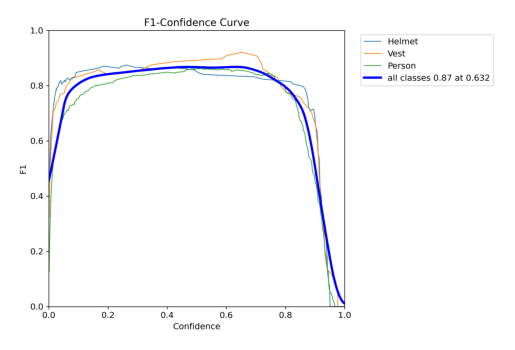



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/PR_curve.png


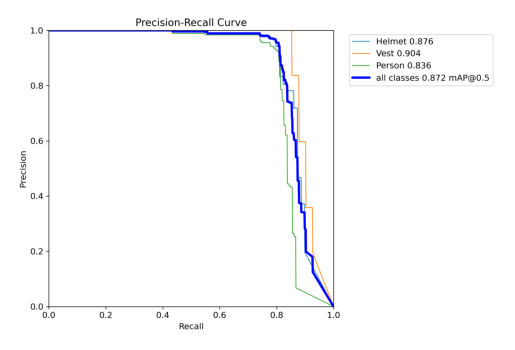



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/P_curve.png


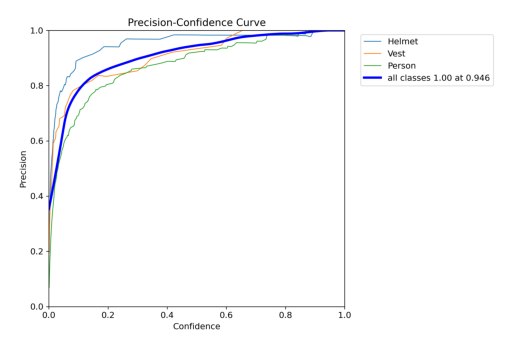



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/R_curve.png


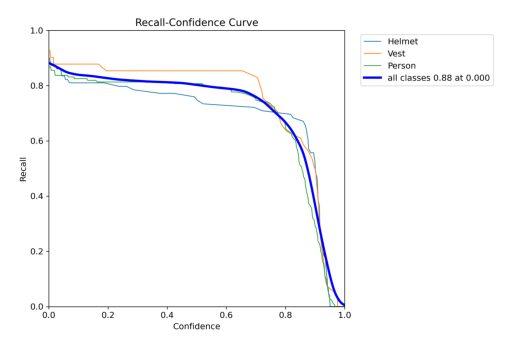



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/confusion_matrix.png


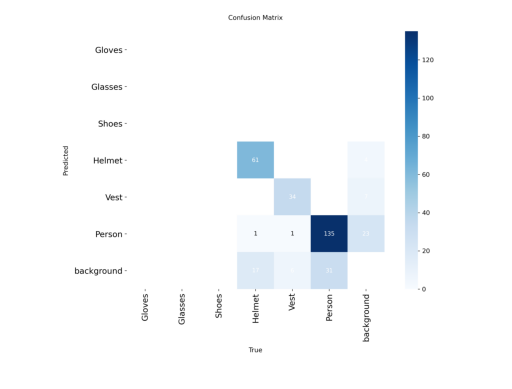



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/confusion_matrix_normalized.png


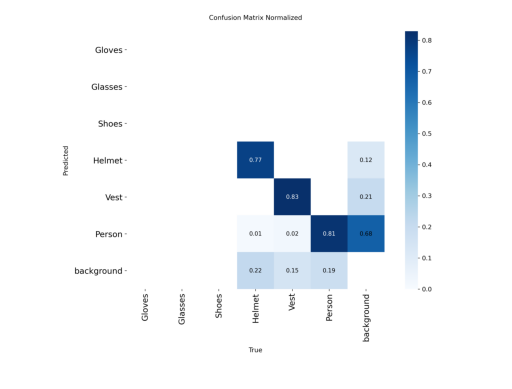



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/labels.jpg


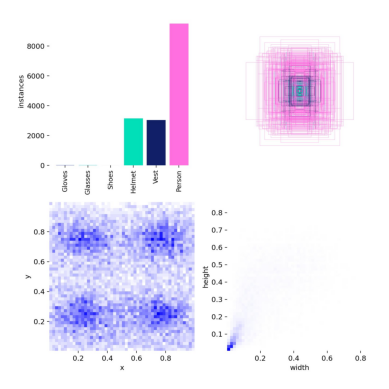



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/labels_correlogram.jpg


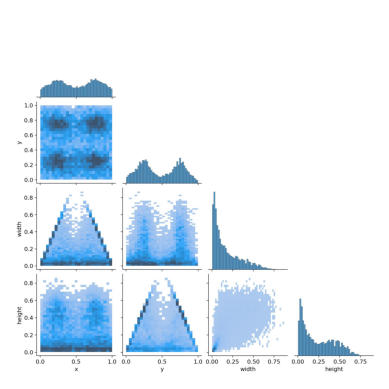



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/results.png


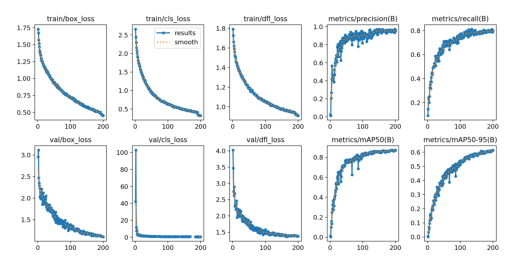

In [ ]:
for file in sorted(results_paths):
    print(file)
    display_one_image(file, print_info = False, axis = 'off')
    print('\n')

In [ ]:
df = pd.read_csv(f'{CFG.OUTPUT_DIR}/{CFG.NAME}/results.csv')
df = df.rename(columns=lambda x: x.replace(" ", ""))
df.to_csv(f'{CFG.ARTIFACTS}/training_log_df.csv', index=False)
df

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,826.569,1.73095,2.66106,1.79355,0.02422,0.09127,0.01222,0.00315,2.95387,42.24170,4.02284,0.070184,0.003313,0.003313
1,2,962.728,1.67081,2.44254,1.72709,0.01327,0.14451,0.00461,0.00128,3.11299,102.81400,3.46872,0.040151,0.006613,0.006613
2,3,1099.880,1.56729,2.29188,1.66036,0.20596,0.23758,0.09909,0.03426,2.46775,11.62330,2.74775,0.010085,0.009881,0.009881
3,4,1242.700,1.51608,2.16057,1.62183,0.26924,0.24927,0.15765,0.06869,2.35201,7.41745,2.62744,0.009851,0.009851,0.009851
4,5,1385.550,1.46647,2.08201,1.59142,0.41639,0.20030,0.13432,0.05611,2.29545,8.00785,2.89446,0.009802,0.009802,0.009802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,27967.900,0.46831,0.33278,0.91762,0.93970,0.80479,0.86479,0.60921,1.11604,0.68061,1.38451,0.000347,0.000347,0.000347
196,197,28106.500,0.46219,0.33082,0.92003,0.93273,0.81044,0.87062,0.60973,1.10899,0.67050,1.37742,0.000298,0.000298,0.000298
197,198,28244.800,0.45068,0.31983,0.91120,0.97380,0.78560,0.87210,0.61518,1.10811,0.66228,1.37722,0.000249,0.000249,0.000249
198,199,28393.000,0.45788,0.32382,0.91021,0.96493,0.78598,0.87258,0.61169,1.10596,0.66288,1.37422,0.000199,0.000199,0.000199


In [ ]:
print('*'*50)
print('\nBest Training Box loss: ', df['train/box_loss'].min(), ', on epoch: ', df['train/box_loss'].argmin() + 1, '\n')
print('\nBest Validation Box loss: ', df['val/box_loss'].min(), ', on epoch: ', df['val/box_loss'].argmin() + 1, '\n')

print('='*50)
print('\nBest Training Cls loss: ', df['train/cls_loss'].min(), ', on epoch: ', df['train/cls_loss'].argmin() + 1, '\n')
print('\nBest Validation Cls loss: ', df['val/cls_loss'].min(), ', on epoch: ', df['val/cls_loss'].argmin() + 1, '\n')

print('='*50)
print('\nBest Training DFL loss: ', df['train/dfl_loss'].min(), ', on epoch: ', df['train/dfl_loss'].argmin() + 1, '\n')
print('\nBest Validation DFL loss: ', df['val/dfl_loss'].min(), ', on epoch: ', df['val/dfl_loss'].argmin() + 1, '\n')

**************************************************

Best Training Box loss:  0.45068 , on epoch:  198 


Best Validation Box loss:  1.10556 , on epoch:  200 


Best Training Cls loss:  0.31983 , on epoch:  198 


Best Validation Cls loss:  0.66127 , on epoch:  200 


Best Training DFL loss:  0.90923 , on epoch:  200 


Best Validation DFL loss:  1.35958 , on epoch:  165 



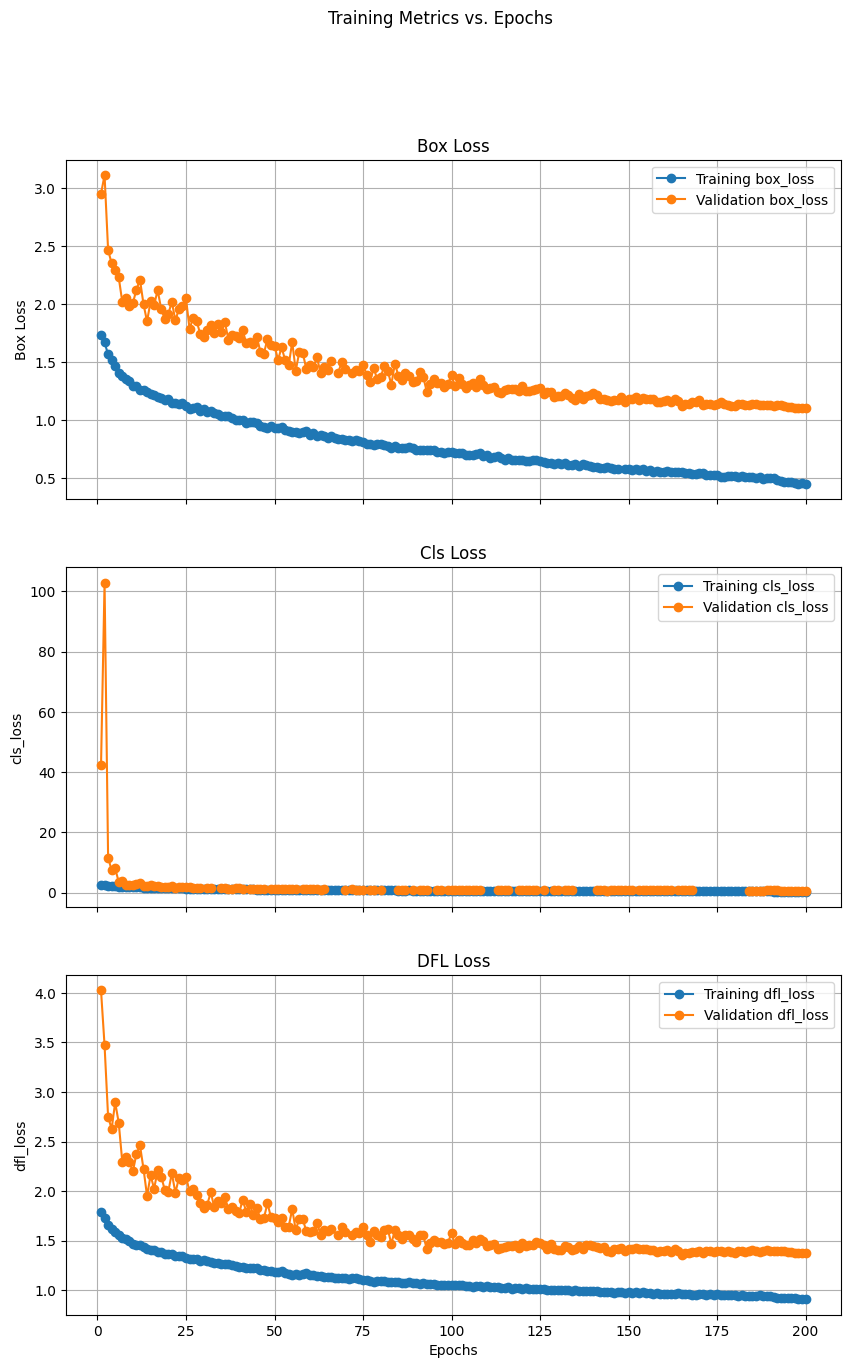

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

### Training and Validation box_loss
ax1.set_title('Box Loss')
ax1.plot(df['epoch'], df['train/box_loss'], label='Training box_loss', marker='o', linestyle='-')
ax1.plot(df['epoch'], df['val/box_loss'], label='Validation box_loss', marker='o', linestyle='-')
ax1.set_ylabel('Box Loss')
ax1.legend()
ax1.grid(True)

### Training and Validation cls_loss
ax2.set_title('Cls Loss')
ax2.plot(df['epoch'], df['train/cls_loss'], label='Training cls_loss', marker='o', linestyle='-')
ax2.plot(df['epoch'], df['val/cls_loss'], label='Validation cls_loss', marker='o', linestyle='-')
ax2.set_ylabel('cls_loss')
ax2.legend()
ax2.grid(True)

### Training and Validation dfl_loss
ax3.set_title('DFL Loss')
ax3.plot(df['epoch'], df['train/dfl_loss'], label='Training dfl_loss', marker='o', linestyle='-')
ax3.plot(df['epoch'], df['val/dfl_loss'], label='Validation dfl_loss', marker='o', linestyle='-')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('dfl_loss')
ax3.legend()
ax3.grid(True)

plt.suptitle('Training Metrics vs. Epochs')
plt.show()

In [ ]:
validation_results_paths = [
    i for i in
    glob.glob(f'{CFG.OUTPUT_DIR}/{CFG.NAME}/*.png') +
    glob.glob(f'{CFG.OUTPUT_DIR}/{CFG.NAME}/*.jpg')
    if 'val_batch' in i
]

len(validation_results_paths)

6

In [ ]:
if len(validation_results_paths) >= 1:
    print(validation_results_paths[-1])

/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch0_pred.jpg


/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch0_labels.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

shape : (1920, 1920, 3)



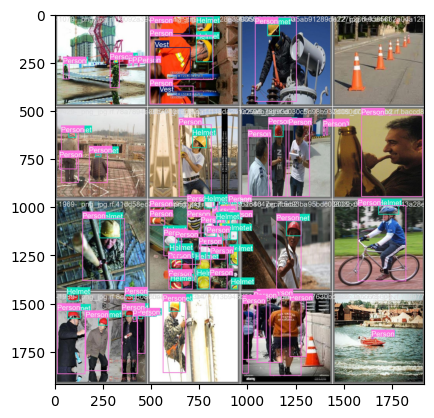



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch0_pred.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

shape : (1920, 1920, 3)



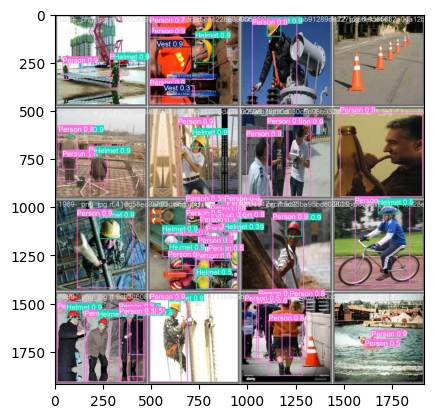



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch1_labels.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

shape : (1920, 1920, 3)



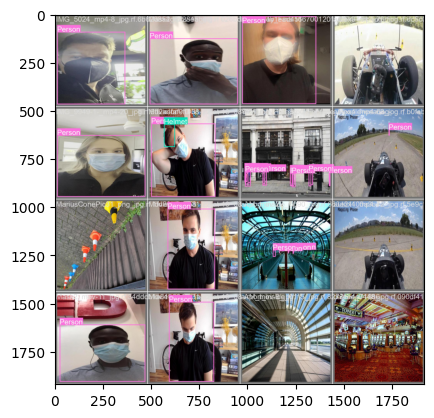



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch1_pred.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

shape : (1920, 1920, 3)



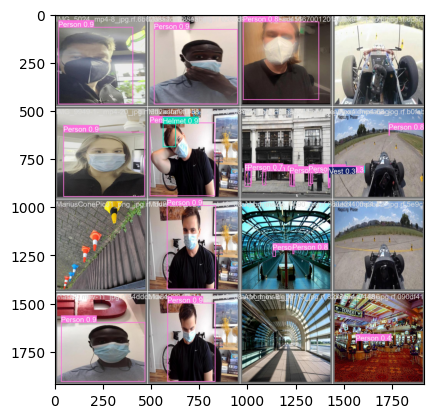



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch2_labels.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

shape : (1920, 1920, 3)



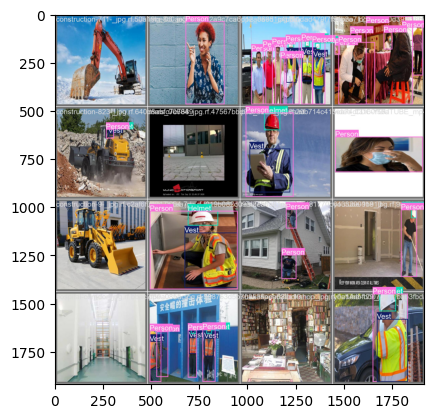



/content/drive/MyDrive/PPE-detection/runs/detection-PPE_final_yolov8l/val_batch2_pred.jpg
type : <class 'PIL.JpegImagePlugin.JpegImageFile'>

shape : (1920, 1920, 3)



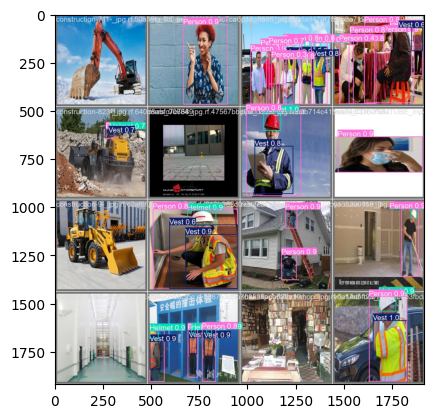

In [ ]:
for file in sorted(validation_results_paths):
    print(file)
    display_one_image(file, print_info = True, axis = 'on')
    print('\n')